# Electric Vechicle Data Analysis

The data is downloaded from kaggle (https://www.kaggle.com/datasets/adarshde/electric-vehicle-population-dataset)

### Importing essential python packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Get the filepath of the CSV file which contains the data

In [2]:
file_path = ''

for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if '.csv' in filename:
            print(os.path.join(dirname, filename))
            file_path = filename

c:\Users\HP\Documents\Projects\EV Analysis\Electric_Vehicle_Population_Data.csv


### Reading the data using Pandas dataframe

In [3]:
data = pd.read_csv(file_path)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


Getting the information on the data in the dataframe

There are some null values in the following columns (`Country`, `City`, `Postal Code`, `Legislative District`, `Vechile Location`, `Electric Utility`, `2020 Census Tract`) for some rows 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

Getting the statistical data on numeric columns

In [5]:
# Dropping the Postal Code and DOL Vehicle ID column
column_list_not_include = data.columns.isin(["Postal Code", "DOL Vehicle ID"])
filtered_columns = data.loc[:, ~column_list_not_include]

filtered_columns.describe()

,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,191407.000000,191407.000000,191407.000000,190993.000000,1.914030e+05
mean,2020.732335,55.657442,994.773258,29.016880,5.297759e+10
std,2.990487,90.151930,8050.523372,14.909417,1.573588e+09
min,1997.000000,0.000000,0.000000,1.000000,1.001020e+09
25%,2019.000000,0.000000,0.000000,17.000000,5.303301e+10
50%,2022.000000,0.000000,0.000000,33.000000,5.303303e+10
75%,2023.000000,72.000000,0.000000,42.000000,5.305307e+10
max,2025.000000,337.000000,845000.000000,49.000000,5.602100e+10


### Visualizing the missing data

Bar chart gives an idea about how many missing values are there in each column.
Lower the value of bar chart more is the number of null values. 

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

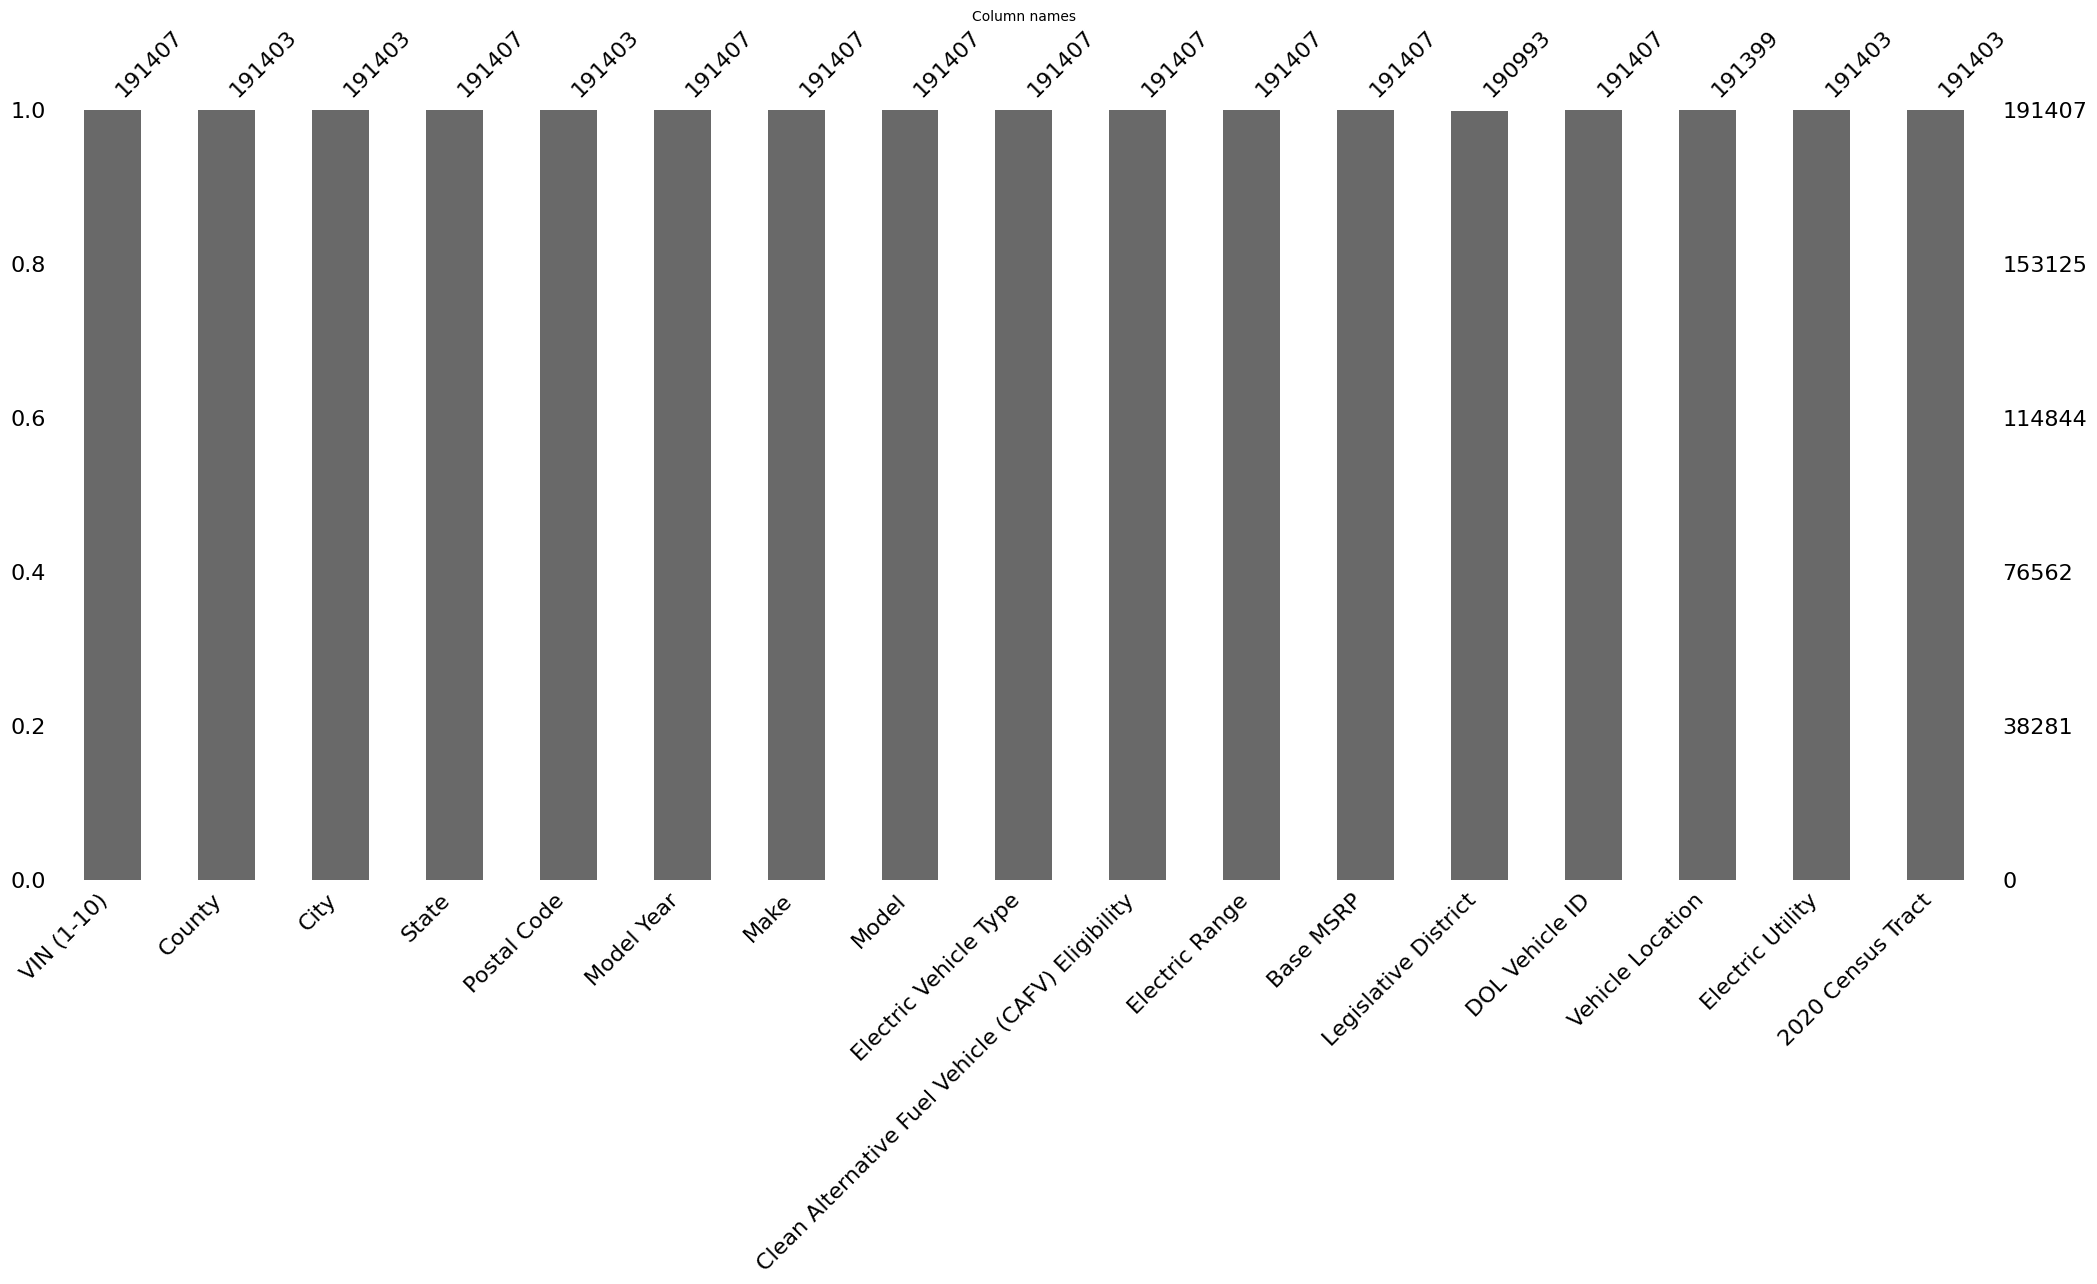

In [11]:
import missingno as msno

msno.bar(data)
plt.show()

Use matrix to deterrmine the pattern of missingness data in various columns of the dataframe

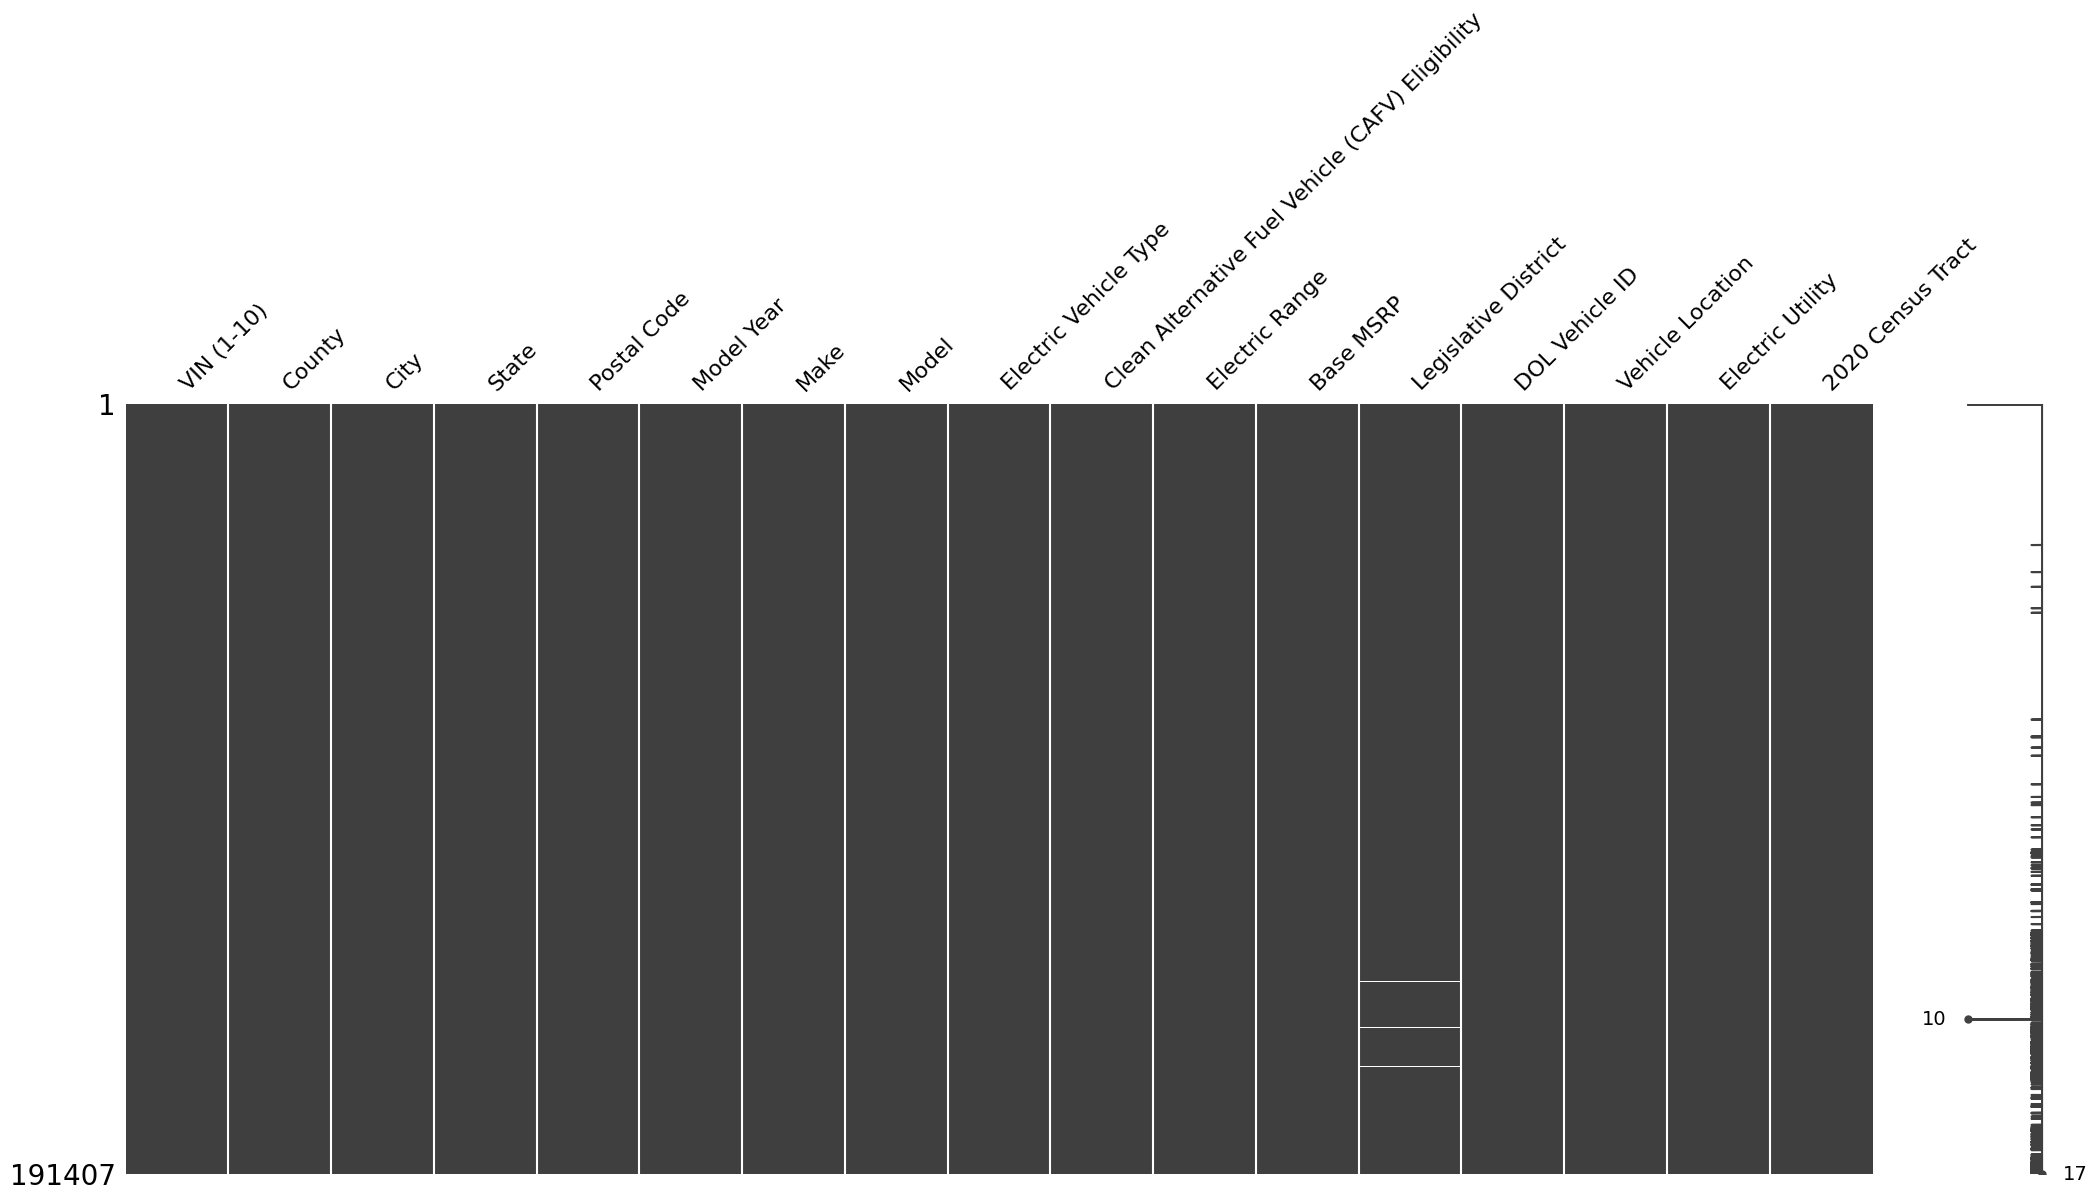

In [13]:
msno.matrix(data)
plt.show()

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

<Axes: >

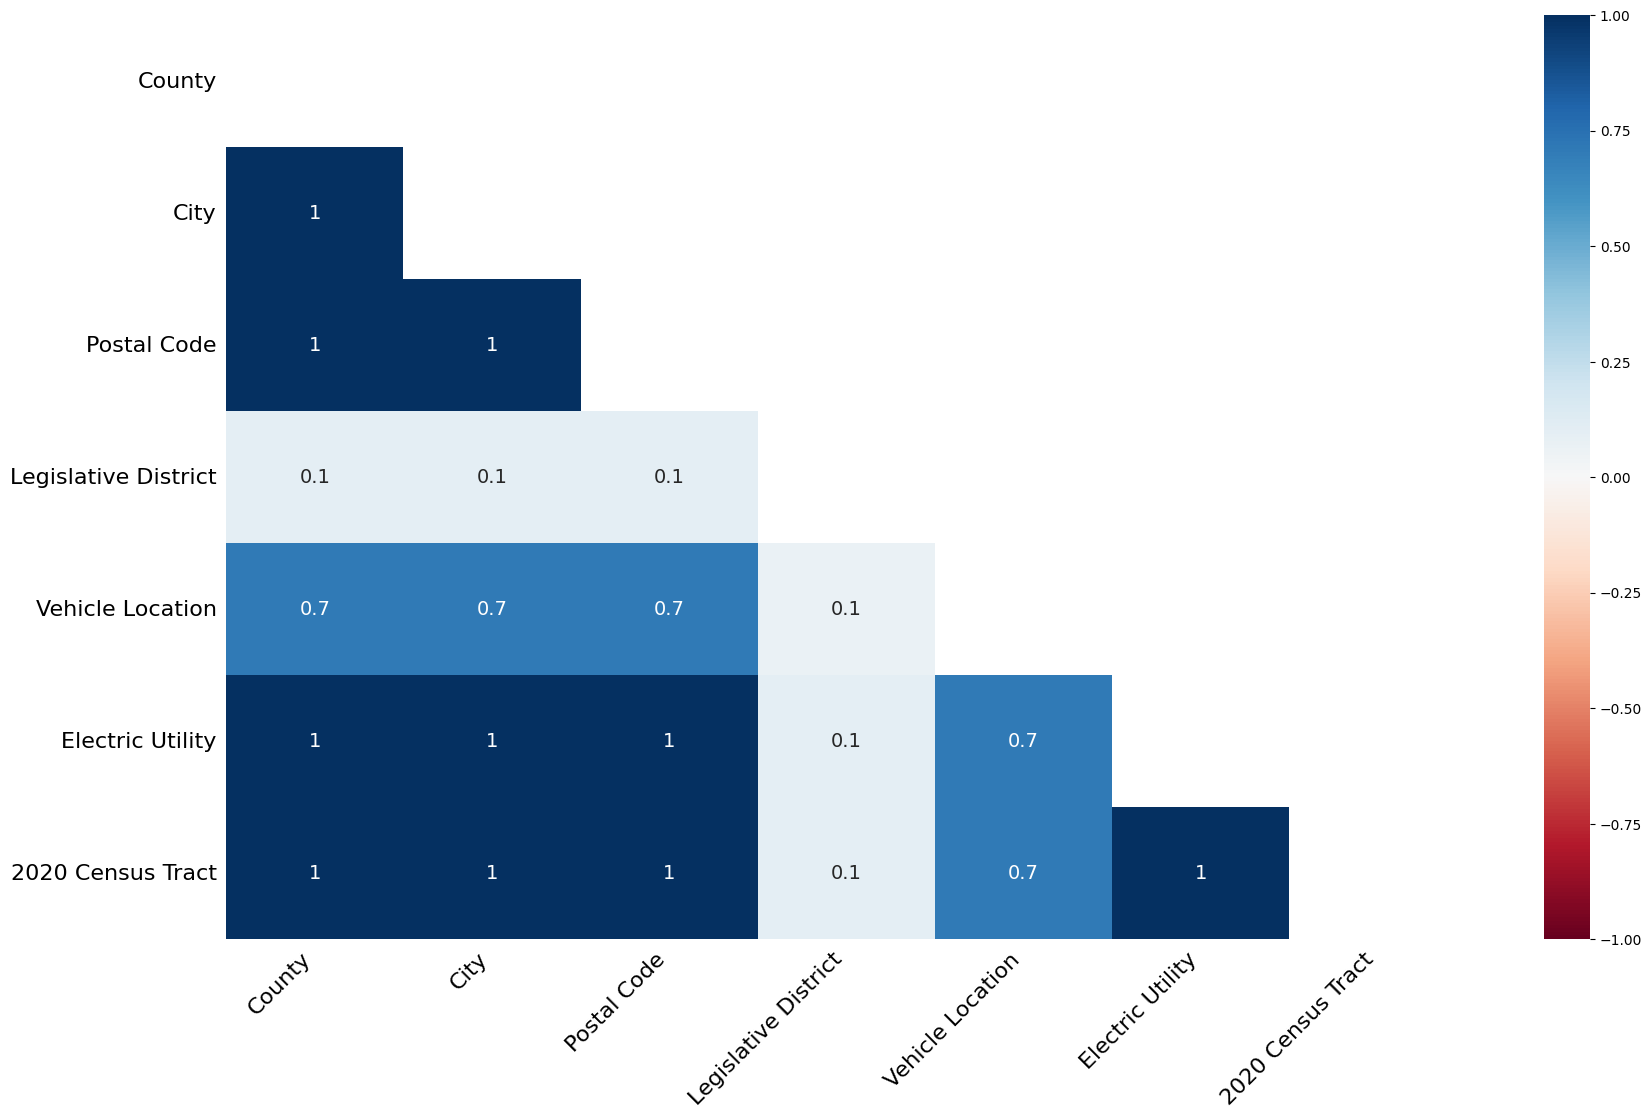

In [14]:
msno.heatmap(data)

Count of Null Values

In [17]:
data.isna().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64